# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Mount Google Drive to access files directly from Colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/Python Course/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check number of rows
print("The number of rows is:", df.shape[0])

# Check number of columns
print("The number of columns is:", df.shape[1])

The number of rows is: 1898
The number of columns is: 9


#### Observations:
The data frame has 1898 rows and 9 coulumns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# info() prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Our data frame includes data types of integers, floats, and objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check if there are any missing/null values
if df.isnull().values.any() == True:
  print("There are null values")
else:
  print("There are no null values")


There are no null values


#### Observations:
There are not missing values in our data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Check the statistical summmary of the data
print("Minimum time it takes to prepare food:", df['food_preparation_time'].min())
print("Maximum time it takes to prepare food:", df['food_preparation_time'].max())
print("Average time it takes to prepare food:", round(df['food_preparation_time'].mean(), 2))

Minimum time it takes to prepare food: 20
Maximum time it takes to prepare food: 35
Average time it takes to prepare food: 27.37


#### Observations:
* The minimum time it takes to prepare a food is 20 minuites.
* The maximum time it takes to prepare a food is 35 minuites.
* The average time it takes to prepare a food is about 27 minuites.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of 'Not given' entries in the 'rating' column
count_not_given = (df['rating'] == 'Not given').sum()

print("Number of orders without ratings:", count_not_given)

Number of orders without ratings: 736


#### Observations:
736 orders out of 1898 orders have no ratings given to them.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64


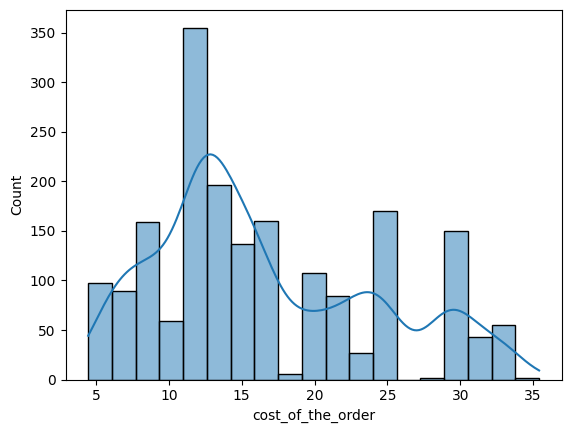

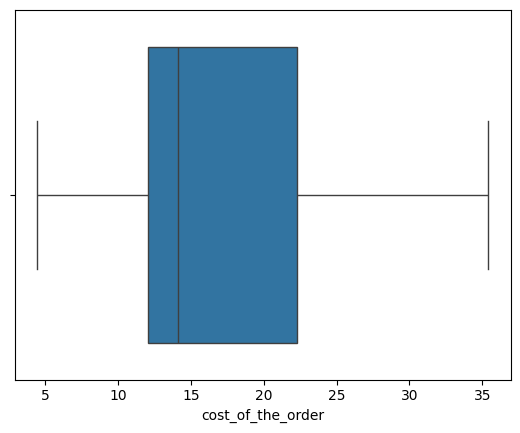

In [ ]:

# Descriptive statistics for 'cost_of_the_order'
print(df['cost_of_the_order'].describe())

# Histogram for 'cost_of_the_order'
sns.histplot(df['cost_of_the_order'], kde=True)
plt.show()

# Box plot for 'cost_of_the_order'
sns.boxplot(x=df['cost_of_the_order'])
plt.show()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


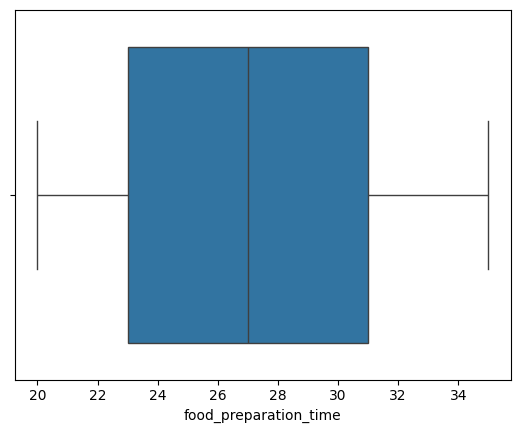

In [ ]:
# Descriptive Statistics for 'preparation_time'
print(df['food_preparation_time'].describe())

# Box plot for 'food_preparation_time'
sns.boxplot(x=df['food_preparation_time'])
plt.show()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


<Axes: xlabel='delivery_time'>

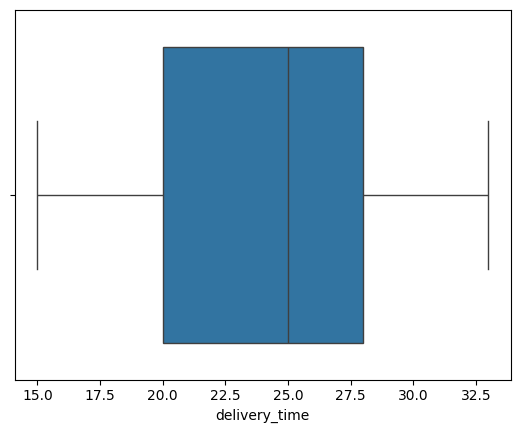

In [ ]:
# Descriptive Statistics for 'delivery_time'
print(df['delivery_time'].describe())

# Box plot for 'delivery_time'
sns.boxplot(x=df['delivery_time'])

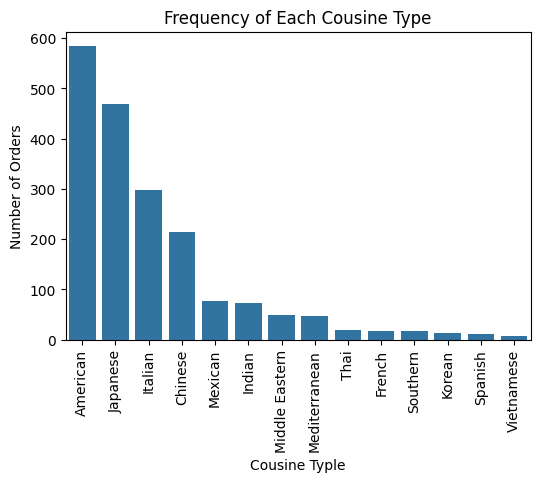

In [ ]:
# Count the frequency of each cuisine type
cousine_count = df['cuisine_type'].value_counts()

# Bar plot for the frequency of each cousine
plt.figure(figsize=(6,4))
sns.barplot(x=cousine_count.index, y =cousine_count.values)
plt.xticks(rotation=90)
plt.xlabel('Cousine Type')
plt.ylabel('Number of Orders')
plt.title('Frequency of Each Cousine Type')
plt.show()

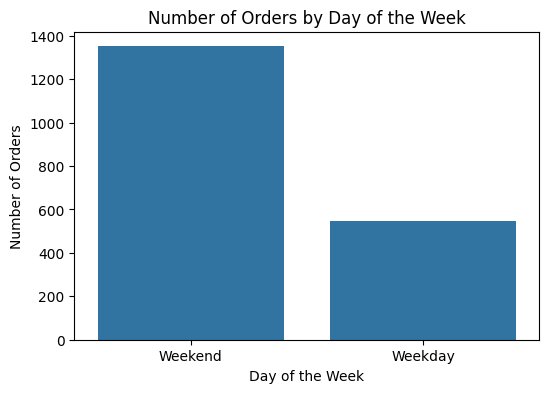

In [ ]:
# Countplot for orders in the weekend vs weekday
plt.figure(figsize=(6,4))
sns.countplot(data = df, x='day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of the Week')
plt.show()

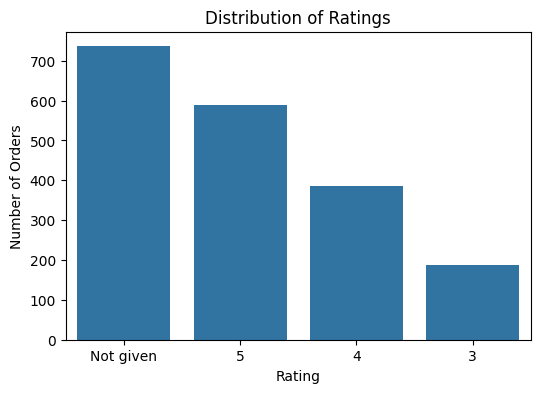

In [ ]:
# Count plot for ratings
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rating', order = df['rating'].value_counts().index)
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.title('Distribution of Ratings')
plt.show()

Observations:
1. Cost of the Order:
* The average cost is approximately 16.50, with a standard deviation of around 7.48.
* The cost ranges from $4.47 to $35.41.
* The distribution shows a right-skewed pattern, indicating that most orders are in the lower price range, with fewer high-cost orders.
2. Food Preparation Time:
* On average, it takes about 27 minutes to prepare the food, with a standard deviation of 4.63 minutes.
* The preparation time ranges from 20 to 35 minutes.
* The distribution seems fairly uniform, suggesting a consistent preparation time across different orders.
3. Delivery Time:
* The average delivery time is around 24 minutes, with a standard deviation of approximately 5 minutes.
* Delivery times range from 15 to 33 minutes.
* The distribution is somewhat uniform but slightly right-skewed, indicating most deliveries are around 20-25 minutes, with some taking longer.
4. Cousine Type:
* American cousine has the highest number of orders.
* Vietnamese cousine has the lowest number of orders.
5. Day of the Week
* There are more number of orders on the weekend compared to number of orders on the weekday.
6. Ratings
* Over 700 orders do not have ratings given
* About 600 orders have a rating of 5
* About 400 orders have a rating of 4
* About 200 orders have a rating of 3

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

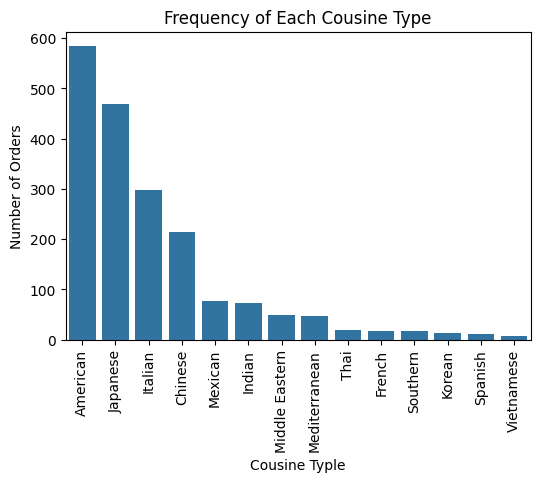

In [ ]:
# Count the occurrences of each unique value in the 'cuisine_type' column
cousine_count = df['cuisine_type'].value_counts()
# Create a bar plot; the x-axis is equal to the unique cuisine types and the y-axis is equal to their counts
plt.figure(figsize=(6,4))
sns.barplot(x=cousine_count.index, y =cousine_count.values)
plt.xticks(rotation=90)
plt.xlabel('Cousine Typle')
plt.ylabel('Number of Orders')
plt.title('Frequency of Each Cousine Type')
plt.show()

#### Observations:
The top 5 restaurants with the most orders recieved are as follows:
1. American
2. Japanese
3. Italian
4. Chinese
5. Mexican


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

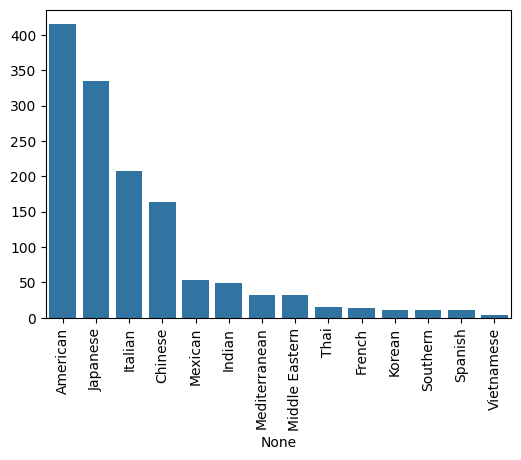

In [ ]:
# Filter the dataframe 'df' to create a new dataframe 'weekend_df' that only contains rows where 'day_of_the_week' is 'Weekend'
weekend_df = df[df['day_of_the_week'] == 'Weekend']

# Count the frequency of each cuisine type on weekends
weekend_cuisine_counts = weekend_df['cuisine_type'].value_counts()

# Create a bar plot for weekend cuisine popularity
plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_cuisine_counts.index, y=weekend_cuisine_counts.values)
plt.xticks(rotation = 90)
plt.show()



#### Observations:
* American cousine is the most popular on weekends with order count of over 400.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

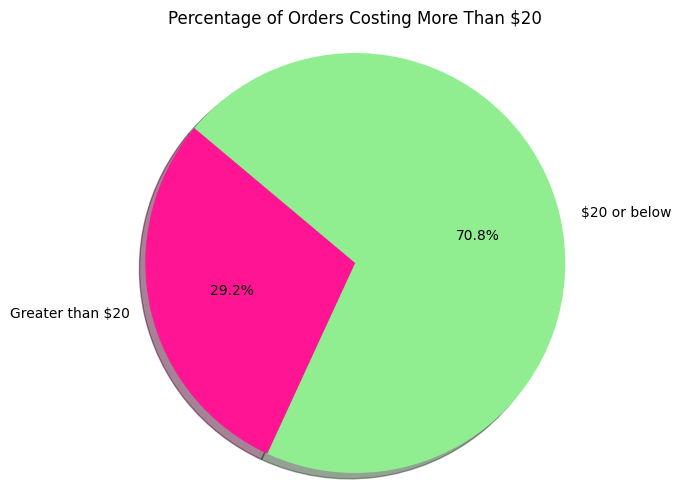

In [ ]:
# Get the number of orders $20 or below
orders_20_or_below = df[df['cost_of_the_order'] <= 20].shape[0]

# Get the number of orders greater than $20
orders_above_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Create a pie chart that shows the proportion of orders above $20 against those $20 or below.
sizes = [orders_above_20, orders_20_or_below]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=['Greater than $20',  '$20 or below'], colors=['#FF1493', 'lightgreen'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Orders Costing More Than $20')
plt.show()

#### Observations:


*   Approximately 29.2% of the orders are greater than $20




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#Descriptive Statistics for 'delivery_time'
print(df['delivery_time'].describe())


count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


#### Observations:
* The mean/average delivery time is approximately 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Count the frequency of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Get the top 3 most frequent customers
top_3_customers = customer_order_counts.head(3)

for customer_id, order_count in top_3_customers.items():
    print(f"Customer ID {customer_id} placed {order_count} orders.")


Customer ID 52832 placed 13 orders.
Customer ID 47440 placed 10 orders.
Customer ID 83287 placed 9 orders.


#### Observations:
* Customer ID 52832 placed 13 orders.
* Customer ID 47440 placed 10 orders.
* Customer ID 83287 placed 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


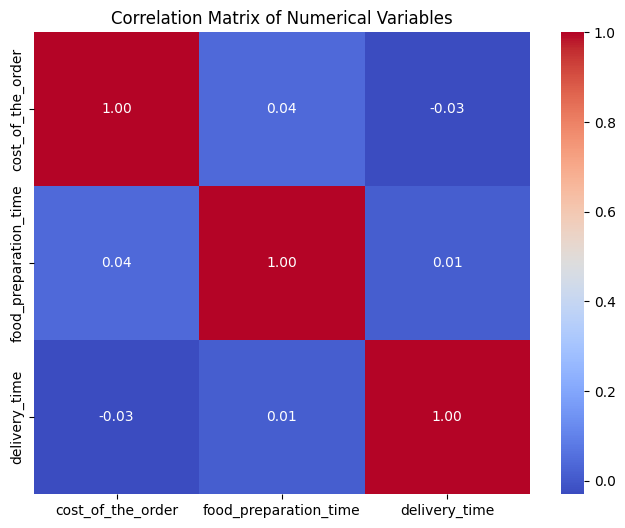

In [ ]:
# Correlation matrix to see relations between numerical variables
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

Observations:
1. Correlation among numerical values
  * The correlation between cost_of_the_order and food_preparation_time is 0.04, which is very close to 0. This indicates a very weak positive linear relationship, suggesting that there's virtually no linear relationship between the cost of the order and the time it takes to prepare the food.
  * The correlation between cost_of_the_order and delivery_time is -0.03, also very close to 0. This indicates a very weak negative linear relationship, implying that there's no meaningful linear relationship between the cost of the order and the delivery time.
  * The correlation between food_preparation_time and delivery_time is 0.01, once again indicating no significant linear relationship between the two variables.

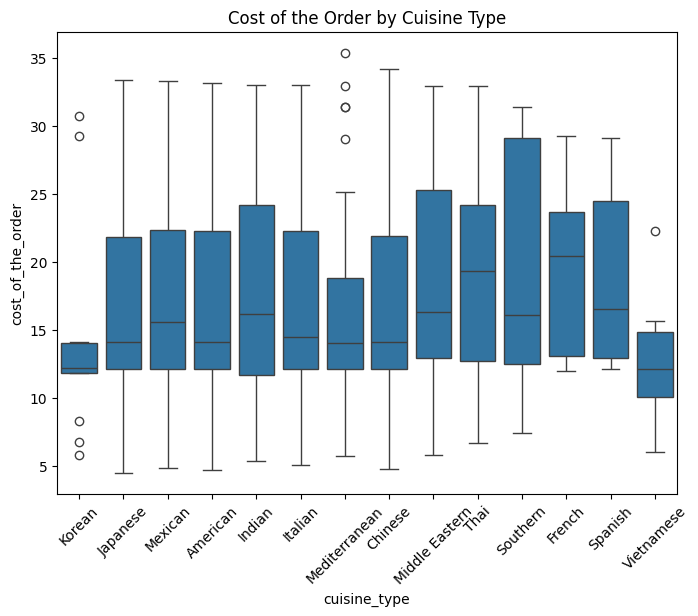

In [ ]:
# Box plot for 'cousine_type' with 'cost_of_order'
plt.figure(figsize=(8, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=45)
plt.title('Cost of the Order by Cuisine Type')
plt.show()


Observations:
* Korean cuisine has the lowest median cost, and its prices are generally lower compared to other cuisines.
* Japanese, Mexican, American, Indian, Italian, Mediterranean, and Chinese cuisine types have a similar range of order costs, as indicated by the length of their boxes and the position of their medians.
* Middle Eastern and Thai cuisine show a slightly higher median cost compared to the previously mentioned group, with Thai cuisine showing a particularly wide range of costs.
* Southern, French, Spanish, and Vietnamese cuisine have fewer orders, as indicated by the shorter boxes, but the costs for these cuisines vary widely, with French cuisine orders tending to be more expensive.
* It’s also important to note the presence of outliers for several cuisines, indicating that there are some orders that are significantly more expensive than the typical order for that cuisine.

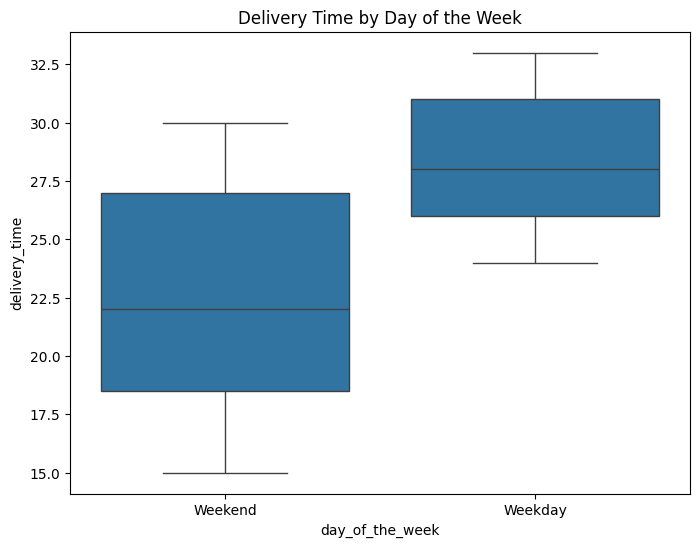

In [ ]:
# Boxplot: x-axis is set to represent different days of the week,  and the y-axis represents the delivery time
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()


Observations
* Median:
  * Weekends: The median is closer to the bottom of the box, the data is likely right-skewed, meaning there are more data points on the lower end of the range.
  * Weekdays: The median is closer to the bottom of the box, the data is slightly left-skewed, with more data points on the lower end.
* Interquartile Range (IQR):
  * The box representing the IQR for weekdays is narrower than for weekends. This indicates that there is less variability in delivery times on weekdays than on weekends.
* Range:
  * The whiskers for weekends appear to extend further than those for weekdays, suggesting that there is a wider total range of delivery times on weekends.
* Outliers:
  * There don't seem to be any points that would be classified as outliers in this visualization, meaning all delivery times fall within a reasonable range of the median values

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter out 'Not given' ratings and convert the 'rating' column to numeric
restaurant_data_filtered = df[df['rating'] != 'Not given'].copy()
restaurant_data_filtered['rating'] = pd.to_numeric(restaurant_data_filtered['rating'])

# Group by restaurant name to calculate average rating and rating count
grouped_restaurant = restaurant_data_filtered.groupby('restaurant_name').agg(
    average_rating=('rating', 'mean'),  # Average rating for each restaurant
    rating_count=('rating', 'count')    # Count of ratings for each restaurant
)

# Select restaurants with more than 50 ratings and an average rating greater than 4
eligible_restaurants = grouped_restaurant[
    (grouped_restaurant['rating_count'] > 50) &
    (grouped_restaurant['average_rating'] > 4)
]

# Resetting index for better readability
eligible_restaurants.reset_index(inplace=True)

print(eligible_restaurants)

             restaurant_name  average_rating  rating_count
0  Blue Ribbon Fried Chicken        4.328125            64
1          Blue Ribbon Sushi        4.219178            73
2                Shake Shack        4.278195           133
3          The Meatball Shop        4.511905            84


#### Observations:
* Restaurants eligable for the promotion are:
  * Blue Ribbon Fried Chicken with an average rating of 4.33 and 64 total ratings..
  * Blue Ribbon Sushi with an average rating of 4.22 and 73 total ratings
  * Shake Shack with an average rating of 4.28 and 133 total ratings.
  * The Meatball Shop with an average rating of 4.512 and 84 total ratings.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define a function to calculate the revenue for each order
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25  # 25% for orders over $20
    elif cost > 5:
        return cost * 0.15  # 15% for orders over $5
    else:
        return 0  # No revenue for orders $5 or less

# Apply the function to each order to calculate the company's revenue
df['company_revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total revenue generated by the company
net_revenue = df['company_revenue'].sum()

# Print the total revenue
print(f'Net Revenue Generated by the Company: ${net_revenue:.2f}')


Net Revenue Generated by the Company: $6166.30


#### Observations:
* The net revenue generated by the Company is $6166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total delivery time by adding food preparation time and delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
orders_over_60_minutes = df[df['total_delivery_time'] > 60].shape[0]

# Count the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

# Print the result
print(f"Percentage of Orders Taking More Than 60 Minutes: {percentage_over_60_minutes:.2f}%")

Percentage of Orders Taking More Than 60 Minutes: 10.54%


#### Observations:
* About 10.54% of orders placed take more than 60 minuites to first prepare and then deliver the food to the customer.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Find the mean delivery time for weekdays and weekends
average_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(average_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
* On average, it takes about 28 minuites for orders to deliver on weekdays.
* On average, it takes about 22 minuites for orders to deliver on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Variation in Delivery Time (Weekday vs Weekend):
  * The data shows that delivery times are longer on weekdays compared to weekends. This could be due to higher traffic or more orders during weekdays.
* High Rated Restaurants:
  * There are restaurants that are eligible for promotional offers based on rating count and average rating.
* Cuisine Type Popularity:
  * Some cusine types are most popular or have higher ratings than others, with American cusine being the most popular.
* Revenue of the company:
  * The company's revenue strategy charges a higher percentage on orders costing more than $20. This indicates that high-value orders are significant contributors to revenue.

### Recommendations:

* Variation in Delivery Time:
  * The company could consider strategies to reduce delivery times on weekdays. They could increase the number of delivery personnel.
* Cuisine Type Popularity:
  * Offer deals from time to time on popular cusines to attract more customers.
* High Rated Restaurants:
  * For the high rated restaurants, offer promotions to encourage loyalty and bring in more orders.
* Revenue of the company:
  * Implement promotions for frequent customers who place high-value orders.
  


In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Project 1: FDS_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Project 1: FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1090508 bytes to /content/drive/MyDrive/Colab Notebooks/Project 1: FDS_Project_LearnerNotebook_FullCode.html


---